In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)

# Homework 1 &mdash; Exploratory Data Analysis with Python

As you learned during the first week of the course, data visualization is a critical component of exploratory data analysis (EDA) that can help you quickly familiarize yourself with the data, as well as identify any outliers or missing values in your dataset. In this homework assignment, you will get a chance to put your new Python and matplotlib skills to use by creating some of the new chart types you learned during class to explore the Global Superstore dataset. 

Global Superstore is a fictional international retail chain that sells office supplies to customers across the globe. The dataset consists of one Excel workbook and one CSV file, both of which you can find in the `datasets/` folder of the course's GitHub [repository](https://github.com/georgetown-analytics/XBUS-400.04.Data_Visualization). 

The Excel file, `"global_superstore.xls"`, contains three sheets&mdash;`Orders`, `People`, and `Returns`. For this assignment, you will work with the sales data from the `Orders` sheet, where each row represents a single transaction. So that you can use pandas `read_csv()` function, the data from the `Orders` sheet has been saved as a separate CSV file, `"global_superstore_orders.csv"`.

To begin, start by importing the CSV file into a pandas DataFrame and take advantage of the method's optional `dtype` parameter set the following fields as a `"category"` dtype&mdash;`Category`, `City`, `Country`, `Order Priority`, `Sales`, `Ship Mode`, and `Shipping Cost`.

Pandas `read_csv` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [3]:
# Import the Global Superstore dataset
df = pd.read_csv('global_superstore_orders.csv', dtype={'Category': 'category',
                                                                    'Ship Mode': 'category',
                                                                    'Country': 'category',
                                                                    'City': 'category',
                                                                    'Order Priority': 'category'})
    
# Print the first 5 rows of the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Here, display all columns and their data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Row ID          51290 non-null  int64   
 1   Order ID        51290 non-null  object  
 2   Order Date      51290 non-null  object  
 3   Ship Date       51290 non-null  object  
 4   Ship Mode       51290 non-null  category
 5   Customer ID     51290 non-null  object  
 6   Customer Name   51290 non-null  object  
 7   Segment         51290 non-null  object  
 8   City            51290 non-null  category
 9   State           51290 non-null  object  
 10  Country         51290 non-null  category
 11  Postal Code     9994 non-null   float64 
 12  Market          51290 non-null  object  
 13  Region          51290 non-null  object  
 14  Product ID      51290 non-null  object  
 15  Category        51290 non-null  category
 16  Sub-Category    51290 non-null  object  
 17  Product Name

Next, call the DataFrame `describe()` method to see some statistical information about the Global Superstore dataset.

Pandas `describe` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [5]:
# Retrieve summary statistics 
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# EDA Questions

Next, imagine that you've just been hired as a Data Analyst in Global Superstore's fast-paced Data Analytics division. You want to quickly get up to speed and learn more about your new employer. And now that you've had a chance to quickly look at your data, what questions do you have?

*Write in 2-3 questions that you are interested in learning about the data*  
1. Which sub cateogry has the most orders?
2. What is the breakdown of the shipping mode?
3. Which segment nets the most profit? Based on that segment, what market yields the most profit for that segment?

Now it's time to try out your new EDA skills! Working in this Jupyter notebook, you should create a minimum of 5 different types of visualizations to explore the data and to see whether it can be used to answer your questions. Each chart must also include a title, and you should be sure to label the x- and y-axis.

If you find that you aren't able to answer all of the questions you originally proposed, don't worry! As Data Analysts, we often don't know what type of insights or analysis is possible until we've had the chance to use some of the EDA techniques you've learned in class. What is important here to complete this assignment is to show your work in the Jupyter notebook and to answer the questions explaining what you discovered while exploring this dataset.

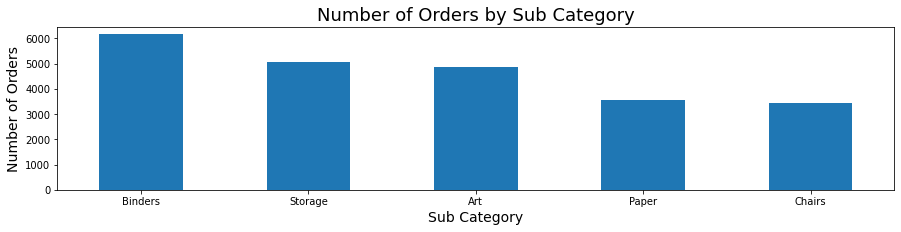

In [85]:
fig, ax = plt.subplots(figsize = (15, 3))

top_five = df['Sub-Category'].value_counts()[:5]

top_five.plot(kind = 'bar', ax = ax, rot = 0)

ax.set_title('Number of Orders by Sub Category', size = 18)

ax.set_xlabel('Sub Category', size = 14)

ax.set_ylabel('Number of Orders', size = 14);

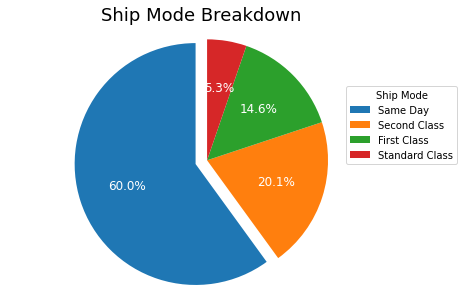

In [86]:
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(df['Ship Mode'].value_counts(),
       labels = df['Ship Mode'].unique().tolist(),
       autopct = '%1.1f%%',
       explode = (0.1, 0, 0, 0),
       startangle = 90,
       textprops = {'fontsize': 12, 'color': 'white'})

ax.set_title('Ship Mode Breakdown', size = 18)

ax.legend(bbox_to_anchor = (1, 0, 0.25, 0.8), fontsize = 10, title = 'Ship Mode')

ax.axis('equal');  

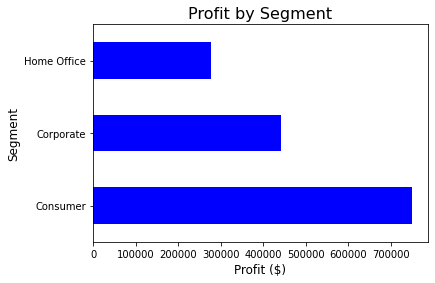

In [90]:
df[['Segment', 'Profit']].groupby('Segment').sum().plot.barh(color = 'blue', legend = '')

plt.title('Profit by Segment', size = 16)

plt.xlabel('Profit ($)', size = 12)
plt.ylabel('Segment', size = 12);

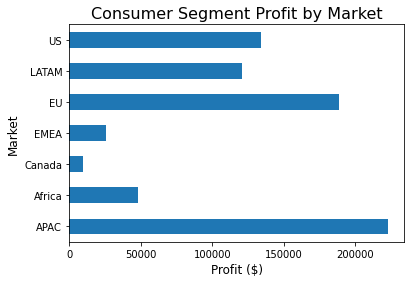

In [91]:
consumer = df[df['Segment'] == 'Consumer']
consumer[['Market', 'Profit']].groupby('Market').sum().plot.barh(legend = '')

plt.title('Consumer Segment Profit by Market', size = 16)

plt.xlabel('Profit ($)', size = 12)
plt.ylabel('Market', size = 12);

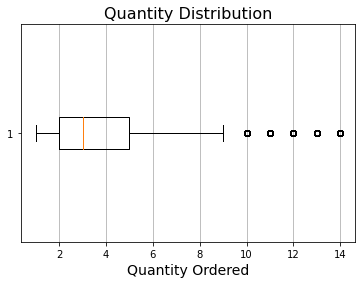

In [100]:
fig, ax = plt.subplots()
  
ax.boxplot(df['Quantity'], showfliers = True, vert = False)

ax.set_title('Quantity Distribution', size = 16)

ax.set_xlabel('Quantity Ordered', size = 14)

ax.xaxis.grid(True);

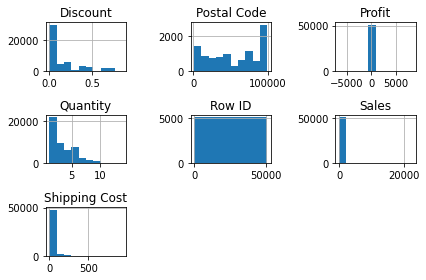

In [101]:
df.hist()

plt.tight_layout();

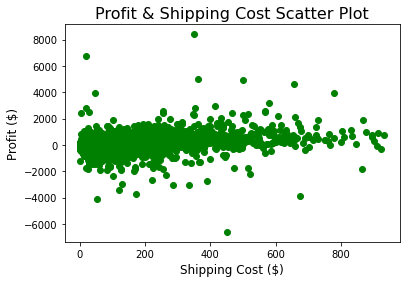

In [107]:
fig, ax = plt.subplots()

ax.plot(df['Shipping Cost'], df['Profit'], 'go')

ax.set_title('Profit & Shipping Cost Scatter Plot', size = 16)

ax.set_xlabel('Shipping Cost ($)', size = 12)
ax.set_ylabel('Profit ($)', size = 12);

# Conclusions

What did you find out? Were you able to answer all of your original questions or did you have new questions come up as you explored the data? In 2-3 short paragraphs, please give a brief overview of what you discovered about your new employer. Was there anything that surprised you or did you find certain types of charts more helpful when you first began? 

**Answer:**  

Overall we were able to answer all of the original questions that we had for our new employer. For the first question, we looked at the top five selling subcategory's. From that we saw that binders had the most number of orders, followed by storage, art, paper and lastly chairs.  The second question was concerned about the breakdown of our ship modes. We learned that the majority (~ 60%) of how we ship is same day; we should definitely dig into this cateogry more to see if there are any countries, cities, customers, etc. that repeatedly ask for same day shipping. Lastly, we learned that our consumer segment yielded the most profit, and from that segment, the APAC and EU markets have the highest profit levels.
    
We also looked at the quantity distribution of items ordered (Per order). Our mean is ~ 3.5, with most orders falling in the one to nine items ordered per order. When it came to examaning further distribution, we displayed the available histograms, but generally they did not provide a vast amount of relevant data. We also looked at the relationship between shipping cost and profit, and found a strong correlation between the two (With some outliers visible).

# Submission

To submit this assignment, you will need to upload a copy of this Jupyter notebook to Canvas. You can do this by clicking the `Submit Assignment` button on the upper right-hand corner of the homework assignment page. Scroll below for the `File Upload` box to choose and attach a copy of the Jupyter notebook file (`.ipynb`).

You will also need to upload a zip file containing the PNG images of your charts and an HTML version of your notebook. The zip folder can be created in one step directly here in your Jupyter notebook by clicking:  `File`  →  `Download as`  →  `HTML with toc (.html)`

Please remember that the assignment is due by the end of the following day at midnight. If you have any questions or find yourself struggling, please don't hesitate to reach out!